In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
import pathlib

In [7]:
import zipfile,os
local_zip = 'daunTomatGab.zip'           
zip_ref = zipfile.ZipFile(local_zip, 'r')   # ekstrak zip file
zip_ref.extractall()                        # folder file hasil ekstrak
zip_ref.close()                             # close fungsi ekstrak zip file

In [2]:
!pip install split_folders

Defaulting to user installation because normal site-packages is not writeable
  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import splitfolders

splitfolders.ratio('C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\daunTomatGabBersih',
                    output='C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\datasetBersih',
                    seed=1337,
                    ratio=(.8, .2)) 

Copying files: 13893 files [02:06, 109.95 files/s]


In [5]:
import os
base_dir = 'C:\Sem 5\Studi Independen\Machine Learning\CapstoneProject\datasetBersih'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,           # normalisasi data
                    horizontal_flip=True,     # data dapat berputar balik secara horizontal                  
                    zoom_range = 0.2          # data dapat memperbesar sepanjang 0.2 
                    ) 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(224, 224)
                                                    )
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=64,
                                                  class_mode='categorical',
                                                  target_size=(224, 224)
                                                  )

Found 11110 images belonging to 11 classes.
Found 2783 images belonging to 11 classes.


In [8]:
class_dict=train_generator.class_indices
classes=list(class_dict.keys())
print ('LIST OF CLASSES ', classes)
print ('CLASS DICTIONARY ',class_dict)
number_of_classes=len(classes) # this is the number of neurons in your top layer of the model
print ('Number of classes = ', number_of_classes)

LIST OF CLASSES  ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']
CLASS DICTIONARY  {'Bacterial_spot': 0, 'Early_blight': 1, 'Late_blight': 2, 'Leaf_Mold': 3, 'Septoria_leaf_spot': 4, 'Spider_mites Two-spotted_spider_mite': 5, 'Target_Spot': 6, 'Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato_mosaic_virus': 8, 'healthy': 9, 'powdery_mildew': 10}
Number of classes =  11


In [9]:
model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3))),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),                                                # layer input untuk deep learning neural network 
    tf.keras.layers.Dense(11, activation= 'softmax')                                 # output layer 3 class
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          589856    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [11]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
            print("\nAkurasi telah mencapai >90%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=4,                    
      epochs=25,                            
      validation_data=test_generator,       
      verbose=2,
      validation_steps=4,             
      callbacks = [callbacks]
      )

Epoch 1/25
4/4 - 304s - loss: 2.9116 - accuracy: 0.1055 - val_loss: 1386.0161 - val_accuracy: 0.1133 - 304s/epoch - 76s/step
Epoch 2/25
4/4 - 262s - loss: 2.5057 - accuracy: 0.0781 - val_loss: 1942330.0000 - val_accuracy: 0.0781 - 262s/epoch - 65s/step
Epoch 3/25


In [17]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

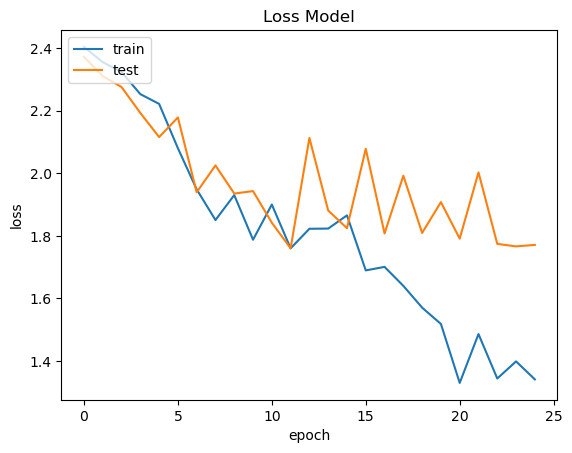

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()